In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

#Import of train.csv data
train_df = pandas.read_csv("train.csv", sep=",", header=0)
train_df.head()



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
#Train data description
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


/home/mcslk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


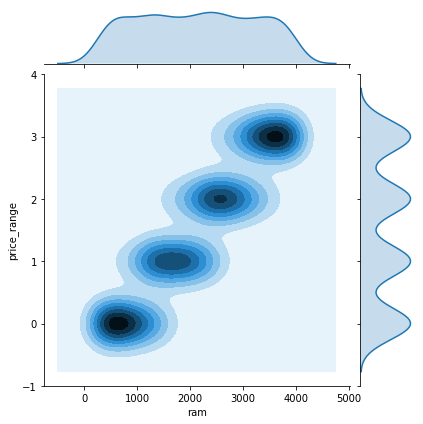

In [3]:
#Relation between ram value and price range
sns.jointplot(x='ram',y='price_range',data=train_df,kind='kde');

/home/mcslk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


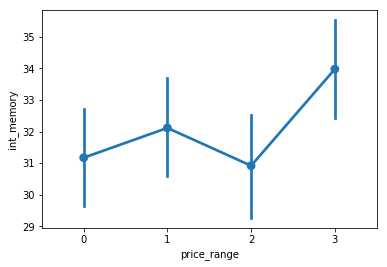

In [4]:
#Relation between internal memory value and price range
sns.pointplot(y="int_memory", x="price_range", data=train_df)

/home/mcslk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


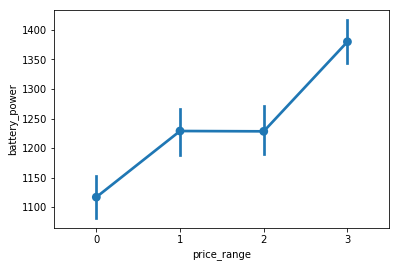

In [5]:
#Relation between battery power value and price range
sns.pointplot(y="battery_power", x="price_range", data=train_df)

/home/mcslk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


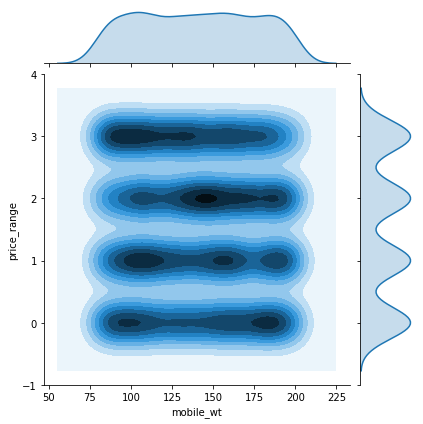

In [6]:
#Relation between mobile weight value and price range
sns.jointplot(x='mobile_wt',y='price_range',data=train_df,kind='kde');

/home/mcslk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


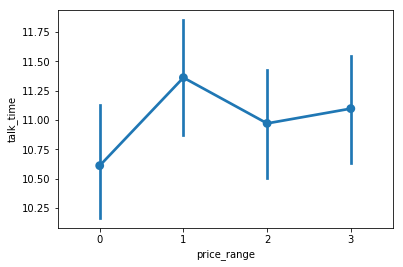

In [7]:
#Relation between talk time value and price range
sns.pointplot(y="talk_time", x="price_range", data=train_df)

In [8]:
#Data Preprocessing
X = train_df.drop(['price_range'], axis=1)
y = train_df['price_range']
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [9]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
#Data Scalling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


/home/mcslk/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mcslk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/home/mcslk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [11]:
#Data Description
pandas.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03,1.340000e+03
mean,2.737445e-16,-6.793902e-17,2.314898e-16,2.939605e-16,7.572715e-17,-3.466547e-16,-2.419292e-17,2.574226e-16,-2.354667e-16,-3.420771e-16,-1.466489e-17,5.087141e-17,-3.471518e-17,1.218035e-16,-1.352566e-17,1.988459e-17,5.828671e-17,3.102825e-16,1.423405e-16,-1.417606e-16
std,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00,1.000373e+00
min,-1.669375e+00,-9.837147e-01,-1.251260e+00,-1.048958e+00,-9.820471e-01,-1.060006e+00,-1.649209e+00,-1.414844e+00,-1.700316e+00,-1.542453e+00,-1.636990e+00,-1.443914e+00,-1.721722e+00,-1.731149e+00,-1.697630e+00,-1.289359e+00,-1.641848e+00,-1.785357e+00,-1.002990e+00,-9.925650e-01
25%,-8.789058e-01,-9.837147e-01,-1.008385e+00,-1.048958e+00,-7.507742e-01,-1.060006e+00,-8.868227e-01,-1.067229e+00,-8.791198e-01,-6.763782e-01,-8.068484e-01,-8.115216e-01,-8.736183e-01,-8.403711e-01,-7.520522e-01,-8.304030e-01,-9.115320e-01,5.601120e-01,-1.002990e+00,-9.925650e-01
50%,-1.862310e-02,-9.837147e-01,-3.688441e-02,9.533268e-01,-2.882282e-01,9.433906e-01,-1.552407e-02,-2.438492e-02,2.702806e-02,-2.433410e-01,2.329353e-02,-2.028863e-01,-2.551485e-02,1.368531e-03,-4.286856e-02,-1.419683e-01,1.362529e-03,5.601120e-01,9.970194e-01,-9.925650e-01
75%,8.765663e-01,1.016555e+00,9.346164e-01,9.533268e-01,6.368636e-01,9.433906e-01,9.102307e-01,1.018459e+00,8.482245e-01,1.055770e+00,8.534354e-01,6.874408e-01,8.751618e-01,8.655453e-01,9.027097e-01,5.464664e-01,9.142570e-01,5.601120e-01,9.970194e-01,1.007491e+00
max,1.701942e+00,1.016555e+00,1.784680e+00,9.533268e-01,3.412139e+00,9.433906e-01,1.727073e+00,1.713689e+00,1.697738e+00,1.488808e+00,1.683577e+00,2.965863e+00,1.740019e+00,1.729259e+00,1.611893e+00,2.841249e+00,1.644573e+00,5.601120e-01,9.970194e-01,1.007491e+00


In [12]:
#Model Training
mlp = MLPClassifier(hidden_layer_sizes=(10), solver='lbfgs', max_iter = 1000, learning_rate='adaptive', learning_rate_init=0.001)

mlp.fit(X_train,y_train)

mlp.score(X_test, y_test)

0.9393939393939394

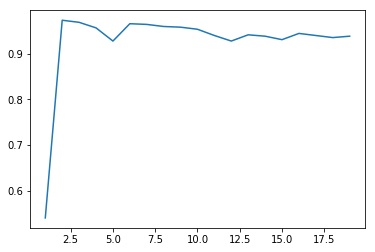

In [13]:
#Relation between algorithm score and number of neurons in model
scores = []
neurons = []
for i in range (1, 20):
    mlp = MLPClassifier(hidden_layer_sizes=(i), solver='lbfgs', max_iter = 1000, learning_rate='adaptive', learning_rate_init=0.0001)
    mlp.fit(X_train,y_train)
    score = mlp.score(X_test, y_test)
    scores.append(score)
    neurons.append(i)
plt.plot(neurons, scores)

In [74]:
#Import of test.csv data
test_df = pandas.read_csv("test.csv", sep=",", header=0)
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [63]:
#Test.csv data preprocessing
X_2 = test_df.drop(['id'], axis=1)
X_2.head()

In [65]:
#Test.csv data preprocessing continued
scaler.fit(X_2)
X_2 = scaler.transform(X_2)
pandas.DataFrame(X_2).describe()

/home/mcslk/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mcslk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.0000,1.000000e+03
mean,4.998779e-17,-7.660539e-17,-8.570922e-17,-2.013945e-16,-3.966272e-17,-7.194245e-17,-3.178013e-17,1.016964e-16,1.183931e-16,-7.893686e-17,-4.463097e-17,6.011858e-17,2.511324e-16,-3.841372e-17,1.696421e-16,7.993606e-18,-1.620926e-16,3.170797e-16,0.0000,1.043610e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.0005,1.000500e+00
min,-1.731692e+00,-1.032529e+00,-1.255832e+00,-1.034598e+00,-1.029568e+00,-9.743294e-01,-1.746835e+00,-1.487247e+00,-1.708411e+00,-1.455175e+00,-1.650347e+00,-1.449276e+00,-1.681129e+00,-1.724979e+00,-1.619796e+00,-1.254383e+00,-1.653355e+00,-1.760216e+00,-1.0000,-1.014099e+00
25%,-8.178521e-01,-1.032529e+00,-1.014535e+00,-1.034598e+00,-8.054080e-01,-9.743294e-01,-8.638147e-01,-7.747932e-01,-8.543635e-01,-1.017923e+00,-8.296057e-01,-8.397502e-01,-9.284856e-01,-8.291569e-01,-9.251013e-01,-7.824554e-01,-7.889153e-01,5.681121e-01,-1.0000,-1.014099e+00
50%,-4.650173e-03,9.684960e-01,-4.934530e-02,9.665588e-01,-3.570874e-01,-9.743294e-01,4.680008e-02,-6.233969e-02,-1.466953e-02,-1.434187e-01,-8.864010e-03,-1.447171e-01,2.326994e-02,1.333458e-02,1.157824e-03,-7.456451e-02,-1.546893e-02,5.681121e-01,0.0000,9.860966e-01
75%,8.808493e-01,9.684960e-01,9.158440e-01,9.665588e-01,5.395539e-01,1.026347e+00,8.470373e-01,1.006341e+00,8.752625e-01,7.310855e-01,9.760260e-01,6.375563e-01,9.056207e-01,8.519182e-01,9.274170e-01,6.333264e-01,8.944680e-01,5.681121e-01,1.0000,9.860966e-01
max,1.736273e+00,9.684960e-01,1.760385e+00,9.665588e-01,3.229478e+00,1.026347e+00,1.674869e+00,1.718794e+00,1.736487e+00,1.605590e+00,1.632619e+00,2.957800e+00,1.725393e+00,1.701076e+00,1.622111e+00,2.992963e+00,1.622418e+00,5.681121e-01,1.0000,9.860966e-01


In [66]:
#Result prediction and file export
result = mlp.predict(X_2)
print(result)
df = pandas.DataFrame(result)
df.to_csv('results.csv')

[2 3 3 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 2 1 3 0 2 0 3 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 0 3 1 1 3 3 2 0 1 0 1 2 3 1 2 1 2 2 3
 3 0 2 0 1 3 0 3 3 0 3 0 3 1 3 0 1 2 2 1 2 1 1 2 1 2 0 0 0 3 0 2 1 1 2 3 3
 2 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 3 2 0 2 1 1 3 1 1 0 3 2 1 2 1 3 2 3 3 3
 2 3 2 3 1 0 3 2 3 3 3 3 3 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 0 2 1 0 0 1 1
 2 2 1 0 0 0 1 1 3 1 1 2 2 2 2 1 1 2 2 3 2 2 1 0 0 1 2 0 2 2 3 0 2 0 3 2 3
 3 1 0 1 1 3 0 1 0 2 2 1 3 1 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 1 1 2 3 1 0 3 2 0 3 0 0 3 1 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 0
 2 2 2 3 1 3 3 1 2 2 3 3 0 3 0 3 1 3 1 2 3 0 1 0 3 1 3 2 3 0 0 0 1 2 0 0 2
 2 0 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 0 0 1 0 0 1
 1 0 0 1 3 2 3 2 3 0 3 0 3 0 1 1 0 2 0 3 2 3 3 1 3 1 2 1 2 2 0 1 1 1 1 0 0
 0 1 2 1 0 3 2 0 2 3 0 0 2 1 2 1 2 2 3 0 3 0 2 3 2 3 0 2 0 2 3 0 1 1 0 0 1
 2 1 3 3 3 1 3 1 2 2 3 3 